# LAB 4.2 - Transfer learning

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L04.02", varname="student");

<big><font color="red">BE PATIENT IN THIS LAB, MODELS ARE LARGE AND MAY TAKE A WHILE TO DOWNLOAD, TRAIN, MAKE INFERENCE, and ALSO FOR GRADERS TO EVALUATE YOUR SUBMISSION.</font></big>

You may want to set the runtime to GPU if in Google Colab

In [ ]:
import tensorflow as tf
!pip install --upgrade tensorflow_hub

import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import h5py
import pandas as pd

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## TASK 1: `tensorflow hub` classification model

Complete the following function so that it uses the [Inception V1 model on `tensorflow hub`](https://tfhub.dev/google/imagenet/inception_v1/classification/4) to obtain the three top ImageNet labels for a given image, along with their probabilities. Observe that:

- the input `img` is an `np.array` of dims `[w,h,3]`
- the model returns `logits` which must be transformed into probabilities with a softmax function: $p_i = \frac{e^{L_i}}{\sum_j e^{L_j}}$, where $p_i$ is the probability of class $i$ and $L_i$ is the `logit` assigned to that class
- you must **resize** the input `img` to dimensions `[1,224,224,3]`. Use [`skimage.transform.resize`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize) with `anti_aliasing=True`.
- you must ensure the **pixel values** of `img` are in the `[0,1]` range. Normalize the image pixel values by substracting the minimum value and dividing by the difference between the maximum and the minimum.
- the logits returned by the model correspond to the labels in [this file](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt) as described in the tensorflob hub model page. This list is passed to your function in the `labels_list` argument.
- you **must return** a dictionary with three elements, containing the class labels as keys and the probabilities as values.

For instance, for the following image you should return this dictionary:

      {'king snake': 0.8190326,
       'ringneck snake': 0.026169779,
       'sea snake': 0.030096276}


    

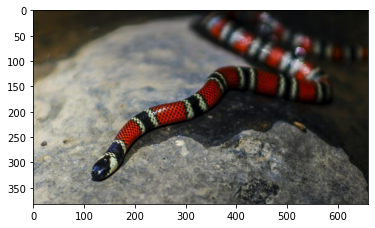

In [ ]:
snake_img = imread('local/imgs/snake.jpg')
plt.imshow(snake_img)

In [ ]:
def get_top3_inceptionv1_labels(img, labels_list):

    from skimage.transform import resize

    #print(labels_list)
    m = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")])
    #m.build([1, 224, 224, 3])  # Batch input shape.
    rimg = resize(img, output_shape=(224,224,3), anti_aliasing=True) # resize and reshape the image to [1,224,224,3]
    #plt.imshow(rimg)
    data_min = np.min(rimg)
    data_max = np.max(rimg)
    rimg = (rimg - data_min) / (data_max - data_min) # normalize the image to a [0,1] range
    #preds = m(rimg.reshape(-1,*rimg.shape).astype(np.float32)).numpy()[0]
    #preds = np.exp(preds)/np.sum(np.exp(preds))
    #np.sum(preds)
    #df = pd.DataFrame(labels_list)
    #print(df)
    #names = df.copy()
    #names["preds"] = preds
    #names = names.sort_values(by="preds", ascending=False)
    #print(rimg.shape)
    logits = m.predict(rimg[np.newaxis])
    #predicted_class = tf.math.argmax(logits[0], axis=-1)
    #print("+++", logits.shape)
    #logits = np.sort(logits)
    #print(labels_list[logits[0][0]])
    #print("...", logits.shape)
    #predicted_class = tf.math.argmax(logits[0], axis=-1)
    #print(predicted_class)
    sl = np.sort(logits[0])
    #print(logits[0])
    #print(logits[0])
    #first = labels_list[sl[len(sl)-1]]
    #second = labels_list[sl[1]]
    #third = labels_list[sl[2]]
    #print(first)
    #print(second)
    #print(third)
    probs = tf.sort(tf.nn.softmax(logits), axis = -1, direction='DESCENDING')
    predicted_class = []
    #print(type(probs[0][0]))
    #a = probs[0][0].numpy()
    #print(a)
    #print(type(a))
    #itemindex = np.where(logits[0] == sl[len(sl)-1])
    #print(sl[len(sl)-1])
    #print(itemindex[0][0])
    #print(itemindex)
    #print(type(logits[0]))
    for i in range(3):
      itemindex = np.where(logits[0] == sl[len(sl)-(i+1)])
      predicted_class.append(itemindex[0][0])

    #print(sl)
    #print(logits[0][66])
    #print(logits[0][54])
    #print(labels_list[66])
    #print(probs[0][1].numpy())
    #print(probs[0][2].numpy())
    #print(predicted_class)
    r = {}      # get the top 3 labels according to the probabilitys into a dict
    r[labels_list[predicted_class[0]]] = probs[0][0].numpy()
    r[labels_list[predicted_class[1]]] = probs[0][1].numpy()
    r[labels_list[predicted_class[2]]] = probs[0][2].numpy()
    return r

check your code with the image above

In [ ]:
get_top3_inceptionv1_labels(snake_img, labels_list)

NameError: ignored

check your code with any image available on the internet

{'chimpanzee': 0.96279883,
 'hippopotamus': 0.0016488637,
 'gorilla': 0.0013446786}

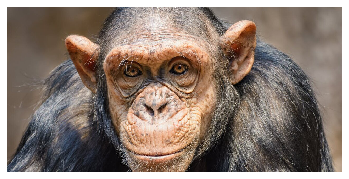

In [ ]:
url_chimp = 'https://scx2.b-cdn.net/gfx/news/2019/canwereallyk.jpg'
!wget -q -O img.jpg $url_chimp
img = imread('img.jpg')
plt.imshow(img); plt.axis("off")
get_top3_inceptionv1_labels(img, labels_list)

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T1');

## TASK 2: `tensorflow hub` feature extraction model

complete the following function such that when given a set of images returns the feature vectors extracted for each image with the [InceptionV1](https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4) `tensorflow hub` model.

Observe that:

- `tensorflow hub` publishes a different model service for classification or for feature extraction
- `imgs` can be any array of shape `[n_images, w, h, n_channels]`
- the output must be of shape `[n_images, 1024]`
- you must return a `numpy` array

In [ ]:
!wget -nc -q https://s3.amazonaws.com/rlx/mini_cifar.h5
with h5py.File('mini_cifar.h5','r') as h5f:
    x_cifar = h5f["x"][:][:1000]
    y_cifar = h5f["y"][:][:1000]
x_cifar.shape, y_cifar.shape

((1000, 32, 32, 3), (1000,))

In [ ]:
def feature_vector_inceptionv1(imgs):
    featuresMo = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4", trainable=True)
    features = featuresMo(imgs).numpy()
    return features

observe we can extract the features of our mini cifar dataset

In [ ]:
xf_cifar = feature_vector_inceptionv1(x_cifar)
xf_cifar.shape

(1000, 1024)

check your code, this sum must be close to:

      array([186.98825, 436.80975, 237.31288, 353.58902, 492.95978, 307.38007,
            234.02158, 260.64508, 186.74268, 265.00177], dtype=float32)

In [ ]:
xf_cifar.sum(axis=1)[:10]

array([186.98795, 436.8097 , 237.31296, 353.5893 , 492.95966, 307.3803 ,
       234.02151, 260.64496, 186.74268, 265.0024 ], dtype=float32)

observe we can do many things now with the features such as

- compute similarity between images in this feature space
- use any classical machine learning method
- etc.

similarity in feature space 26.519081


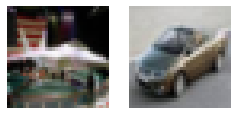

In [ ]:
i,j = np.random.randint(len(xf_cifar), size=2)
imgA, imgB = x_cifar[i], x_cifar[j]
plt.figure(figsize=(4,2))
plt.subplot(121); plt.imshow(imgA); plt.axis("off")
plt.subplot(122); plt.imshow(imgB); plt.axis("off");
print ("similarity in feature space", np.linalg.norm(xf_cifar[i]-xf_cifar[j]))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

estimator = SVC(gamma=.001)
cross_val_score(estimator, xf_cifar, y_cifar)

array([0.755, 0.73 , 0.775, 0.765, 0.73 ])

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T2');

## TASK 3: Model for fine tuning

Complete the following function so that it builds a model with three layers:

- one `hub.KerasLayer` with [https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1](https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1) feature vector extraction and `trainable` according to the function parameter.
- one `Dense` layer with `dense_size` neurons and `relu` activation
- one `Dense` layer as output with 3 neurons (one for each class) and `softmax` activation

In [ ]:
def create_model(trainable=False, dense_size=100):
    num_classes = 3
    m = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1", trainable=True),
        tf.keras.layers.Dense(dense_size, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return m

with `dense_size=100` and `input_shape=[None, 32, 32, 3]` your model should have a total of `64,354,083` parameters, with only  `256,403` trainable params if `trainable=False`, and `64,043,363` if `trainable=True`

In [ ]:
m = create_model(trainable=True)
m.build(input_shape=[None, 32, 32, 3])
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2560)              64097680  
                                                                 
 dense_2 (Dense)             (None, 100)               256100    
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 64,354,083
Trainable params: 64,043,363
Non-trainable params: 310,720
_________________________________________________________________


you can now train your model. If you set `trainable=True` you should get >80% accuracy in validation with 10-30 epochs

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 32, 32, 3) (800,) (200, 32, 32, 3) (200,)


In [ ]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
m.fit(x_train, y_train, epochs=10,batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
50/50 [==============================] - 73s 221ms/step - loss: 1.8418 - accuracy: 0.4250 - val_loss: 2.7367 - val_accuracy: 0.3150
Epoch 2/10
50/50 [==============================] - 6s 129ms/step - loss: 1.4023 - accuracy: 0.5688 - val_loss: 2.4441 - val_accuracy: 0.2950
Epoch 3/10
50/50 [==============================] - 8s 152ms/step - loss: 1.2516 - accuracy: 0.6425 - val_loss: 1.3460 - val_accuracy: 0.5700
Epoch 4/10
50/50 [==============================] - 6s 128ms/step - loss: 1.0289 - accuracy: 0.7337 - val_loss: 1.1238 - val_accuracy: 0.6800
Epoch 5/10
50/50 [==============================] - 6s 129ms/step - loss: 0.8856 - accuracy: 0.7675 - val_loss: 0.9434 - val_accuracy: 0.7700
Epoch 6/10
50/50 [==============================] - 6s 128ms/step - loss: 0.8432 - accuracy: 0.8012 - val_loss: 0.8497 - val_accuracy: 0.8350
Epoch 7/10
50/50 [==============================] - 6s 128ms/step - loss: 0.8736 - accuracy: 0.8163 - val_loss: 0.9055 - val_accuracy: 0.7750
Epoch

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T3');

error: invalid token, login again. Invalid padding... (set session.debug=True for tracebacks)